In [5]:
%matplotlib inline

import pandas as pd
import seaborn as sns

In [6]:
# df = pd.read_csv('https://raw.githubusercontent.com/nealcaren/CSSS-CABD/master/files/titanic_train.csv')

df = pd.read_csv('files/titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
#scikit doesn't like missing data
print(len(df))
df_nomissing = df.copy()

df_nomissing.dropna(subset=['Age','Fare'], 
                    inplace=True)

X = df_nomissing[['Age']]

# note the extra [] below
y = df_nomissing[['Fare']]

len(y)

891


714

In [48]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
model.coef_

array([[ 0.34996368]])

In [50]:
model.intercept_

array([ 24.30090145])

In [51]:
y_hat = model.predict(X)

In [52]:
y_hat

array([[ 32.00010245],
       [ 37.59952136],
       [ 33.39995717],
       [ 36.54963031],
       [ 36.54963031],
       [ 43.19894026],
       [ 25.00082881],
       [ 33.74992086],
       [ 29.20039299],
       [ 25.70075618],
       [ 44.59879499],
       [ 31.30017508],
       [ 37.94948504],
       [ 29.20039299],
       [ 43.54890395],
       [ 25.00082881],
       [ 35.14977558],
       [ 36.54963031],
       [ 36.19966663],
       [ 29.55035668],
       [ 34.09988454],
       [ 27.1006109 ],
       [ 37.59952136],
       [ 30.9502114 ],
       [ 38.29944872],
       [ 47.39850444],
       [ 34.09988454],
       [ 38.99937608],
       [ 31.65013877],
       [ 30.60024772],
       [ 29.20039299],
       [ 38.29944872],
       [ 33.74992086],
       [ 25.35079249],
       [ 30.9502114 ],
       [ 30.60024772],
       [ 26.75064722],
       [ 31.65013877],
       [ 41.44912185],
       [ 34.44984822],
       [ 47.04854076],
       [ 31.65013877],
       [ 34.27486638],
       [ 26

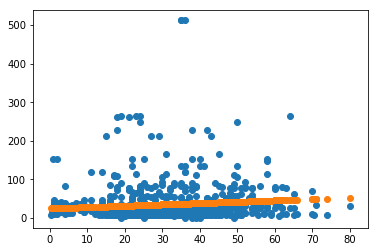

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.scatter(X, y_hat)

In [54]:
df_nomissing['Fare_predicted'] = y_hat

In [55]:
df_nomissing.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_predicted
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,5.083746
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,24.447886
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,31.343921
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,34.099885
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,37.599521
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,52.297996


In [56]:
df_nomissing['Male'] = df_nomissing['Sex'] == 'male'

In [57]:
df_nomissing['Male'].mean()

0.63445378151260501

In [58]:
X = df_nomissing[['Age','Male']]

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

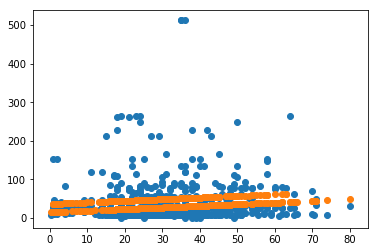

In [59]:
plt.scatter(df_nomissing['Age'], y)
plt.scatter(df_nomissing['Age'], model.predict(X))

In [61]:
df_nomissing['Fare_predicted_2'] = model.predict(X)

df_nomissing[['Fare','Fare_predicted','Fare_predicted_2']].describe()

,Fare,Fare_predicted,Fare_predicted_2
count,714.000000,714.000000,714.000000
mean,34.694514,34.694514,34.694514
std,52.918930,5.083746,11.494073
min,0.000000,24.447886,14.648225
25%,8.050000,31.343921,24.988194
50%,15.741700,34.099885,31.963405
75%,33.375000,37.599521,45.015170
max,512.329200,52.297996,62.192929


In [62]:
df_nomissing[['Fare','Fare_predicted','Fare_predicted_2']].corr()

,Fare,Fare_predicted,Fare_predicted_2
Fare,1.000000,0.096067,0.217202
Fare_predicted,0.096067,1.000000,0.442293
Fare_predicted_2,0.217202,0.442293,1.000000


<div class="alert alert-info">
Add PassengerId to the model!

Does it improve the correlation?
</div>

<div class="alert alert-info">
Load `seattle_bike.csv`. Can you estimate bike traffic on the Seattle's Freemont bridge?

Variables:    
`Mon`-`Sun`: Day's of the week    
`holiday`: Federal holiday    
`daylight_hrs`: Hours of daylight    
`PRCP`: Amount of precipitation    
`dry day`: No precipitation    
`Temp (C)`: Temperature    
`annual`: Fractional year since program started    
</div>
Data courtesy of Jake VanderPlas.

In [7]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()

X = daily[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
y = daily['dry day']
lm.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
probabilities = lm.predict_proba(X)
probabilities[:10]

array([[ 0.41477297,  0.58522703],
       [ 0.43399355,  0.56600645],
       [ 0.45962138,  0.54037862],
       [ 0.38276405,  0.61723595],
       [ 0.39556081,  0.60443919],
       [ 0.39556081,  0.60443919],
       [ 0.42758635,  0.57241365],
       [ 0.41477297,  0.58522703],
       [ 0.43399355,  0.56600645],
       [ 0.45962138,  0.54037862]])

In [10]:
daily['dry probability'] = [pr[1] for pr in probabilities]

daily[['dry day','dry probability']].describe()

,dry day,dry probability
count,1064.000000,1064.000000
mean,0.584586,0.584306
std,0.493025,0.024802
min,0.000000,0.540379
25%,0.000000,0.566006
50%,1.000000,0.585227
75%,1.000000,0.604439
max,1.000000,0.617236


In [12]:
daily.groupby('dry day')['dry probability'].mean()

dry day
0.0    0.582786
1.0    0.585386
Name: dry probability, dtype: float64

<div class="alert alert-info">
Using world bank data, what arethe biggest correlates of country deathrate?</div>

In [7]:
df = pd.read_excel('files/country_stats.xls')

In [8]:
df.head()

,country,region,population,area_sq_mi,pop_density,infant_mortality,gdp_pc,litearcy,phones,arable,crops,other,climate,birthrate,deathrate,agiculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,163.07,700.0,36.0,3.22,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.59,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.42,9.27,8000.0,97.0,259.54,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.14,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [10]:
df.describe()

,population,area_sq_mi,pop_density,infant_mortality,gdp_pc,litearcy,phones,arable,crops,other,climate,birthrate,deathrate,agiculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.042511,35.506964,9689.823009,82.838278,236.057668,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.187541,35.389899,10049.138513,19.722173,227.992091,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.030000,2.290000,500.000000,17.600000,0.170000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.155000,8.150000,1900.000000,70.600000,37.810000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.770000,21.000000,5550.000000,92.500000,176.150000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.110000,55.705000,15700.000000,98.000000,389.630000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,191.190000,55100.000000,100.000000,1035.550000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000
